In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare base
Base = automap_base()

# reflect an existing database into a new model
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [81]:
# Display first row of data in dictionary format to get sense of layout
first_row = session.query(Measurement).first()
first_row.__dict__   

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9531b90fd0>,
 'station': 'USC00519397',
 'prcp': 2.0,
 'id': 0,
 'date': '2010-01-01',
 'tobs': 18.3}

In [125]:
station_count = session.query(Measurement.station).all()
station_count.count

<function list.count(value, /)>

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [95]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).group_by(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

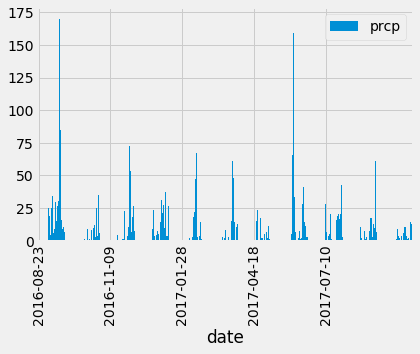

In [143]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(year_ago)

# Perform a query to retrieve the data and precipitation scores
meas_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
meas_df = pd.DataFrame(meas_data)
meas_df.columns = ['date', 'prcp']
meas_df.set_index('date', inplace=True)
meas_df = meas_df.groupby(['date'])
meas_df = meas_df.max()

# # Sort the dataframe by date 
meas_df.sort_values(by= 'date')
# meas_df.to_csv('prcp_data.csv')


# Use Pandas Plotting with Matplotlib to plot the data
meas_df.plot.bar()
# plt.tight_layout()
plt.xticks(ticks=[1,70,140,210,280], labels=['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
plt.show()


In [141]:
date_qs = meas_df.index
date_qs

Index(['2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27', '2016-08-28',
       '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02',
       ...
       '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23'],
      dtype='object', name='date', length=365)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()